In [50]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pmdarima import auto_arima
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from prophet import Prophet
from sklearn.model_selection import train_test_split

In [51]:
# Load the data from a CSV file
df = pd.read_csv("../data/all_v2_data.csv", sep=",")

In [52]:
df.dropna(inplace=True)


In [53]:
df.columns

Index(['Mnd', 'Ap', 'Hoyre', 'Frp', 'SV', 'SP', 'KrF', 'Venstre', 'MDG',
       'Rodt', 'Andre', 'Ap_var', 'Hoyre_var', 'Frp_var', 'SV_var', 'SP_var',
       'KrF_var', 'Venstre_var', 'MDG_var', 'Rodt_var', 'Andre_var',
       'Ap_skandale', 'Hoyre_skandale', 'Frp_skandale', 'SV_skandale',
       'Sp_skandale', 'KrF_skandale', 'Venstre_skandale', 'MDG_skandale',
       'Rodt_skandale', 'Andre_skandale', 'AP_skandale_lag3',
       'AP_skandale_lag6', 'Hoyre_skandale_lag3', 'Hoyre_skandale_lag6',
       'Frp_skandale_lag3', 'Frp_skandale_lag6', 'SV_skandale_lag3',
       'SV_skandale_lag6', 'Sp_skandale_lag3', 'Sp_skandale_lag6',
       'KrF_skandale_lag3', 'KrF_skandale_lag6', 'Venstre_skandale_lag3',
       'Venstre_skandale_lag6', 'MDG_skandale_lag3', 'MDG_skandale_lag6',
       'Rodt_skandale_lag3', 'Rodt_skandale_lag6', 'Andre_skandale_lag3',
       'Andre_skandale_lag6', 'Ap_reg', 'Hoyre_reg', 'Frp_reg', 'SV_reg',
       'Sp_reg', 'KrF_reg', 'Venstre_reg', 'MDG_reg', 'Rodt_reg', 'A

In [54]:
y=df['Ap']

In [55]:
y_train

203    17.2
98     32.5
43     38.4
29     28.7
101    34.1
       ... 
111    31.7
19     32.3
97     33.0
184    18.7
107    36.1
Name: Ap, Length: 162, dtype: float64

In [56]:
X=df[['Ap_skandale', 'Hoyre_skandale', 'Frp_skandale', 'SV_skandale',
       'Sp_skandale', 'KrF_skandale', 'Venstre_skandale', 'MDG_skandale',
       'Rodt_skandale', 'Andre_skandale', 'AP_skandale_lag3',
       'AP_skandale_lag6', 'Hoyre_skandale_lag3', 'Hoyre_skandale_lag6',
       'Frp_skandale_lag3', 'Frp_skandale_lag6', 'SV_skandale_lag3',
       'SV_skandale_lag6', 'Sp_skandale_lag3', 'Sp_skandale_lag6',
       'KrF_skandale_lag3', 'KrF_skandale_lag6', 'Venstre_skandale_lag3',
       'Venstre_skandale_lag6', 'MDG_skandale_lag3', 'MDG_skandale_lag6',
       'Rodt_skandale_lag3', 'Rodt_skandale_lag6', 'Andre_skandale_lag3',
       'Andre_skandale_lag6', 'Ap_reg', 'Hoyre_reg', 'Frp_reg', 'SV_reg',
       'Sp_reg', 'KrF_reg', 'Venstre_reg', 'MDG_reg', 'Rodt_reg', 'Andre_reg',
       'AP_reg_lag3', 'AP_reg_lag6', 'H_reg_lag3', 'H_reg_lag6',
       'FRP_reg_lag3', 'FRP_reg_lag6', 'SV_reg_lag3', 'SV_reg_lag6',
       'SP_reg_lag3', 'SP_reg_lag6', 'KRF_reg_lag3', 'KRF_reg_lag6',
       'Venstre_reg_lag3', 'Venstre_reg_lag6', 'MDG_reg_lag3', 'MDG_reg_lag6',
       'Rodt_reg_lag3', 'MDG_reg_lag6.1', 'Andre_reg_lag3', 'Andre_reg_lag6',
       'ledighet', 'ledig_trend3', 'ledig_trend6', 'styringsrente',
       'styringsrente_trend3', 'styringsrente_trend6']]

In [61]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2. Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=1000, random_state=42)
rf.fit(x_train, y_train.values.ravel())

# 3. Predict on test data
y_pred = rf.predict(x_test)

# 4. Evaluate performance
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.3f}")
print(f"Test RMSE: {rmse:.3f}")
print(f"Test R² Score: {r2:.3f}")

Test MSE: 4.347
Test RMSE: 2.085
Test R² Score: 0.906


C:\Users\jens.nilsen\python\WPy64-31230\python-3.12.3.amd64\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


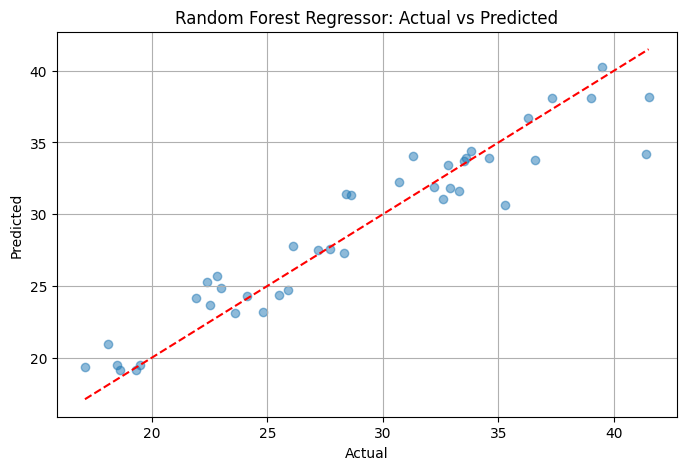

In [62]:

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Random Forest Regressor: Actual vs Predicted")
plt.grid(True)
plt.show()

In [59]:
importances = rf.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

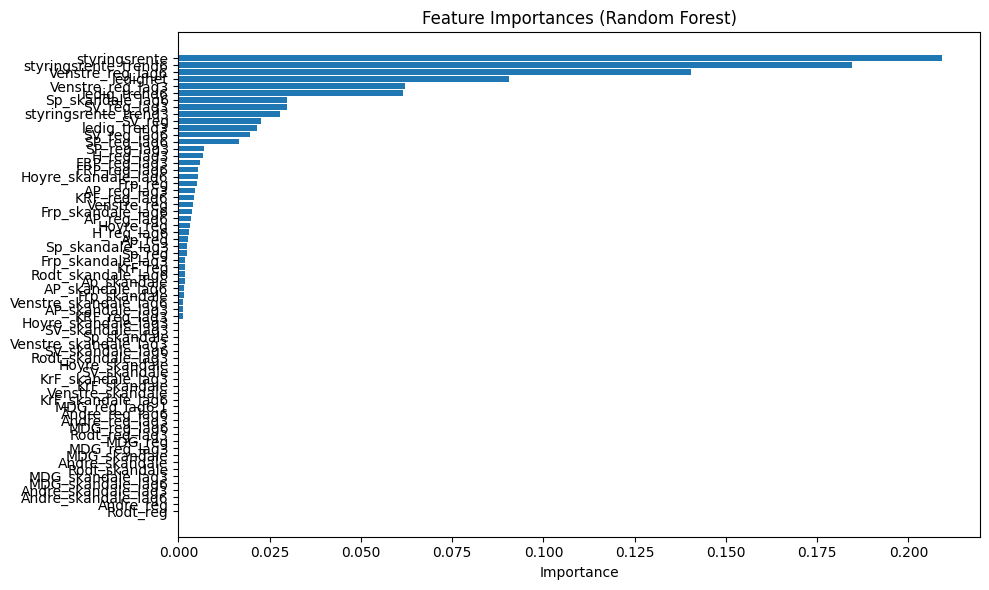

In [60]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()  # Most important on top
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()